# Project: Tesla vs GameStop Stock Analysis
**Course:** IBM Data Science Professional Certificate  
**Author:** Anjali Savariya  
**Description:** In this project, we extract stock and revenue data for Tesla and GameStop using yfinance and web scraping, and visualize the stock prices in dashboards.


## Question 1: Extract Tesla Stock Data Using yfinance
**Instructions:**  
- Use `yfinance` to download Tesla stock data.  
- Reset the index and display the first five rows of the dataframe.


In [1]:
# Install yfinance if not installed
!pip install yfinance --upgrade --no-cache-dir

import yfinance as yf
import pandas as pd

# Extract Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     ------------------- ---------------- 524.3/949.2 kB 913.4 kB/s eta 0:00:01
     -------------------------------------- 949.2/949.2 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.t

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Extract Tesla Revenue Data Using Webscraping
**Instructions:**  
- Use the `requests` library to download the Tesla revenue webpage.  
- Parse the HTML using `BeautifulSoup`.  
- Extract the Tesla revenue table into a dataframe with columns: `Date` and `Revenue`.  
- Clean the Revenue column by removing `$` and `,`.  
- Drop empty/null rows and display the last five rows.


In [2]:
import requests
from bs4 import BeautifulSoup

# Download webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

# Extract Tesla revenue table
tesla_revenue = pd.read_html(html_data)[1]
tesla_revenue.columns = ["Date", "Revenue"]

# Clean Revenue column
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()


C:\Users\GURU IS GREAT\AppData\Local\Temp\ipykernel_15200\4150382268.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(html_data)[1]


,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## Question 3: Extract GameStop Stock Data Using yfinance
**Instructions:**  
- Use `yfinance` to download GameStop stock data.  
- Reset the index and display the first five rows of the dataframe.


In [3]:
# Extract GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Extract GameStop Revenue Data Using Webscraping
**Instructions:**  
- Extract the GameStop revenue table from the same webpage.  
- Clean the Revenue column and drop empty/null rows.  
- Display the last five rows.


In [4]:
# Extract GameStop revenue table
gme_revenue = pd.read_html(html_data)[0]
gme_revenue.columns = ["Date", "Revenue"]

# Clean Revenue column
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"",regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue.tail()


C:\Users\GURU IS GREAT\AppData\Local\Temp\ipykernel_15200\3114460519.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(html_data)[0]


,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


## Question 5: Plot Tesla Stock and Revenue Dashboard
**Instructions:**  
- Create a function `make_graph` to plot the stock closing price vs. revenue.  
- Use the Tesla data and provide a title.


Matplotlib is building the font cache; this may take a moment.


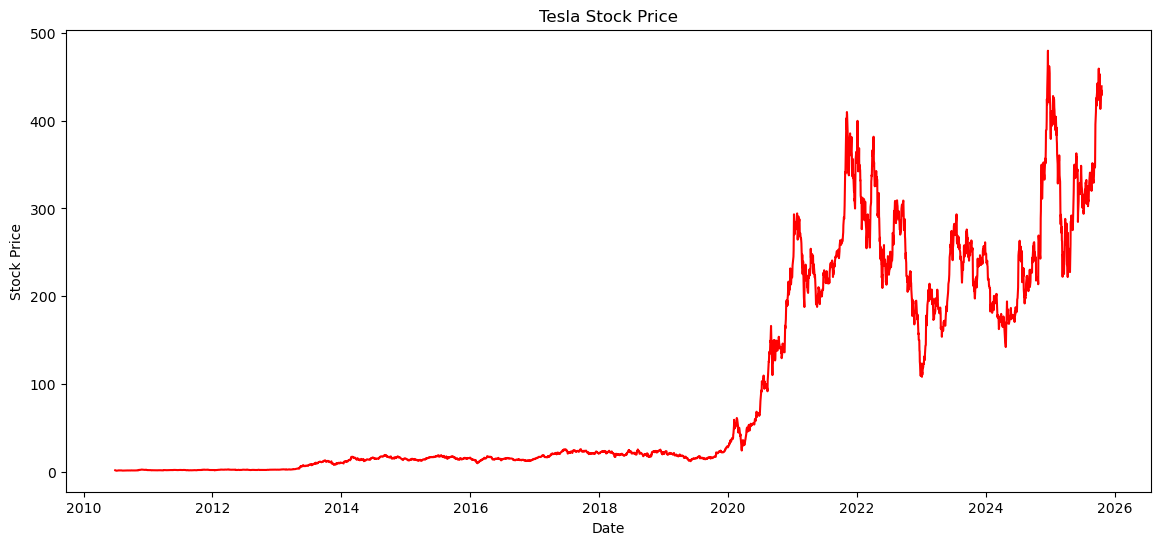

In [5]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(14,6))
    ax1.plot(stock_data['Date'], stock_data['Close'], color="red")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price")
    ax1.set_title(f"{stock_name} Stock Price")
    plt.show()

# Tesla Graph
make_graph(tesla_data, tesla_revenue, "Tesla")


## Question 6: Plot GameStop Stock and Revenue Dashboard
**Instructions:**  
- Use the same `make_graph` function to plot GameStop stock vs revenue.  
- Provide a title for the graph.


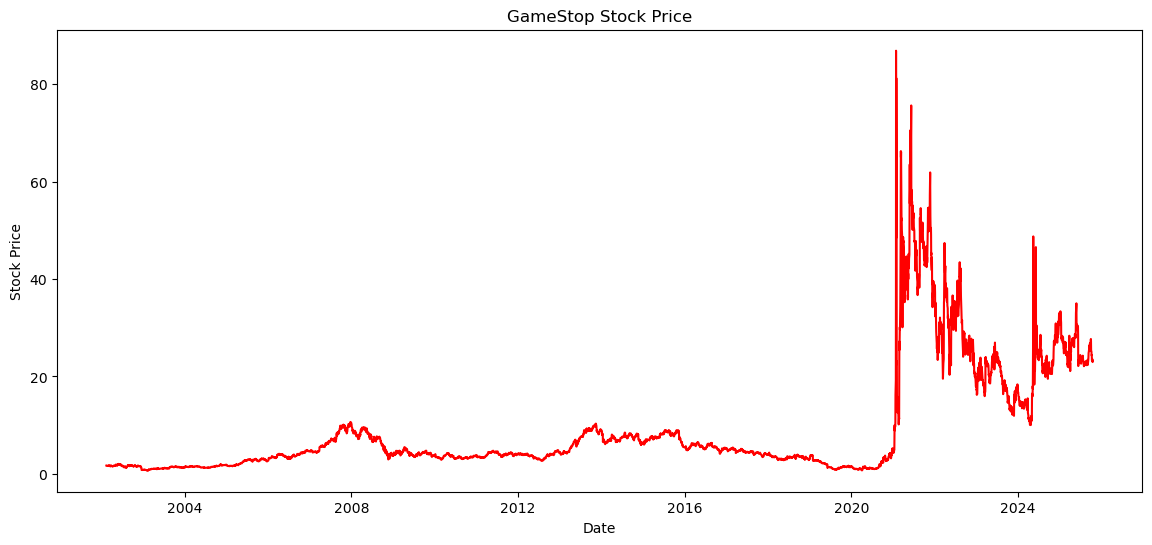

In [7]:
# GameStop Graph
make_graph(gme_data, gme_revenue, "GameStop")


author :
anjali savariya